# Project - LSTM-CNN model
NLP - Sentimental Analysis of "Large Movie Review Dataset" using LSTM network

CSE - 6363 - 003 : Machine Learning 

Team - 18 : Members -
Preeti Singh - 1002013566
Sai Sarath Reddy Koppula - 1002081785
Renu Aakanksha Veesam - 1002113666

- IMDB Dataset is available in the Keras Module.
- For the purpose of this project implementation, we are considering the IMDB dataset available in the Keras Module.
- Please note that the original IMDB dataset has 25,000 training samples and 25,000 testing samples.
- Whereas the IMDB module available in Keras module contains 25,000 samples.
- Therefore, we are treating these 25,000 samples for training the model.
- The rest 25,000 samples available in the original dataset will be used for testing the model.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
from spacy.lang.en.stop_words import STOP_WORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# As mentioned earlier, we are using the IMDB Dataset as available in Tensorflow Keras Module
# Reference URL: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

# Please note that we are loading the data as is, not removing any words based on frequency
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print("Number of samples in the Training Dataset: ", X_train.shape[0])
print("Number of samples in the Testing Dataset: ", X_test.shape[0])

Number of samples in the Training Dataset:  25000
Number of samples in the Testing Dataset:  25000


In [ ]:
# How does the data in Tensorflow IMDB Dataset Looklike?

# Let's retrieve a random sample from the dataset
random_sample = np.random.randint(X_train.shape[0])

print("A Random Sample from the training dataset: ")
print(X_train[random_sample])

A Random Sample from the training dataset: 
[1, 4922, 9519, 15062, 3745, 47, 6, 55, 52, 565, 114, 21, 9, 2262, 34, 954, 1373, 469, 4, 20, 13, 244, 6, 1155, 2343, 5, 161, 358, 14, 20, 55, 76, 13, 197, 4, 302, 71, 527, 21, 36, 238, 306, 441, 8, 1155, 476, 4, 2661, 1102, 2262, 4, 206, 25, 124, 15, 12, 16, 427, 1214, 95, 50, 16, 4, 24102, 7760, 35, 445, 1103, 37, 12471, 6949, 1526, 84, 5, 15062, 11, 63, 4922, 16, 13625, 8, 1176, 12, 32, 630, 40, 6, 801, 235, 52, 20, 54, 4922, 5, 41, 14186, 4932, 3242, 15159, 4108, 24102, 7760, 5, 2330, 90, 1437, 11, 4, 130, 38, 4922, 2271, 6, 2037, 2539, 2539, 2539, 146, 1623, 18, 4, 375, 29684]


In [ ]:
# Based on the 95th Percentile, setting the MAX_LEN to 610
MAX_LEN = 610

In [ ]:
# Updating the training data
X_train = sequence.pad_sequences(X_train, maxlen=MAX_LEN, padding='post')

# Updating the testing data too
X_test = sequence.pad_sequences(X_test, maxlen=MAX_LEN, padding='post')

In [ ]:
# Let's retrieve a random sample from the dataset
random_sample = np.random.randint(X_train.shape[0])

print("A Random Sample from the training dataset: ")
print(X_train[random_sample])

A Random Sample from the training dataset: 
[   1   13   86  219   14   20  145   11    4 5453    5  150   11 2945
   14   20  131    9   31    7    4  118  102   13   28  126  110   13
   62  386  259    8  168   33   14   20   25   80   24   30  806   12
    9   73  917   46   38  147    5  115    6  753  561    4  116    9
  897    5    4 1622  166    4   20  306   40   25   26   50   39    4
  454  208   56    8    4  130   14   20    9    4  552   15  166   25
 1585  129  692    4  524  127   35  321  292    7 2265    4  250   37
 4674   14 2993 1707 2487   11    4 5509    5   12  287   89   59 1319
    8 2007   11    4 5509   32  584   12    9 1297   15  259  100 2007
  467  141 5114   14    9  138   14   20    9   38 2276    4  192   15
   14    9    6  283   65  166    4   20   60   53  221    5    8  104
   15    6  185  250  100 2007   39   14 7021    9 3981   13  169   14
   20   31   15   13   70  106  120    5  120  174    5   31   15   13
  115   79 1458    7   14    9  8

In [ ]:
MAX_TOKEN = max([t for tokens in X_train for t in tokens ])

print("MAX TOKEN# IS: ", MAX_TOKEN)

MAX TOKEN# IS:  88586


In [ ]:
# Trying different Embedding Lengths
EMBED_LENS = [32, 64]

# Trying different Batch Sizes
BATCH_SIZES = [32, 64]

In [ ]:
model_vs_params = {}
model_vs_history = {}
model_vs_accuracy = {}

model_number = 1

for EMBED_LEN in EMBED_LENS:

  for BATCH_SIZE in BATCH_SIZES:

    print("Currently Running Model with Hyper-parameter Combination# ", model_number)

    # Create the LSTM-CNN model
    model = Sequential()

    # Add an embedding layer
    model.add(Embedding(input_dim=88586, output_dim=EMBED_LEN, input_length=MAX_LEN))

    # Add an LSTM layer
    model.add(LSTM(units=50, return_sequences=True))

    # Add a 1D convolutional layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

    # Add a max pooling layer
    model.add(MaxPooling1D(pool_size=2))

    # Add another 1D convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

    # Add another max pooling layer
    model.add(MaxPooling1D(pool_size=2))

    # Flatten the output before the dense layer
    model.add(Flatten())

    # Add a dense layer for classification
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model summary
    #model.summary()

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE)

    scores = model.evaluate(X_test, y_test, verbose=0)

    model_vs_params[model_number] = [EMBED_LEN, BATCH_SIZE]
    model_vs_history[model_number] = history.history
    model_vs_accuracy[model_number] = scores[0]*100

    model_number += 1

    print()
    print()
    print("*"*50)

Currently Running Model with Hyper-parameter Combination#  1
Epoch 1/10
782/782 [==============================] - 116s 144ms/step - loss: 0.3459 - accuracy: 0.8367
Epoch 2/10
782/782 [==============================] - 56s 71ms/step - loss: 0.1241 - accuracy: 0.9557
Epoch 3/10
782/782 [==============================] - 32s 42ms/step - loss: 0.0522 - accuracy: 0.9819
Epoch 4/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0319 - accuracy: 0.9893
Epoch 5/10
782/782 [==============================] - 27s 35ms/step - loss: 0.0200 - accuracy: 0.9926
Epoch 6/10
782/782 [==============================] - 25s 32ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 7/10
782/782 [==============================] - 24s 30ms/step - loss: 0.0122 - accuracy: 0.9957
Epoch 8/10
782/782 [==============================] - 24s 31ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 9/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0127 - accuracy: 0.9964
Epoch 10/10
782/782

In [ ]:
for i in model_vs_params.keys():
  print("Combination# ", i)

  print("-"*50)
  print("Combination Details: ")
  print("EMBED_LEN: ", model_vs_params[i][0], " BATCH_SIZE: ", model_vs_params[i][1])
  print("-"*50)

  print("Training Set Accuracy: ", model_vs_history[i]['accuracy'][-1])
  print("Test Set Accuracy: ", model_vs_accuracy[i])
  print("*"*50)

Combination#  1
--------------------------------------------------
Combination Details: 
EMBED_LEN:  32  BATCH_SIZE:  32
--------------------------------------------------
Training Set Accuracy:  0.9972800016403198
Test Set Accuracy:  91.75071120262146
**************************************************
Combination#  2
--------------------------------------------------
Combination Details: 
EMBED_LEN:  32  BATCH_SIZE:  64
--------------------------------------------------
Training Set Accuracy:  0.9962000250816345
Test Set Accuracy:  93.03390383720398
**************************************************
Combination#  3
--------------------------------------------------
Combination Details: 
EMBED_LEN:  64  BATCH_SIZE:  32
--------------------------------------------------
Training Set Accuracy:  0.9984800219535828
Test Set Accuracy:  114.90621566772461
**************************************************
Combination#  4
--------------------------------------------------
Combination Details:

# Hyper-parameter Results:

Combination#  4
--------------------------------------------------
Combination Details:
EMBED_LEN:  64  BATCH_SIZE:  64
--------------------------------------------------
Training Set Accuracy:  0.9973999857902527
Test Set Accuracy:  95.7604169845581

In [ ]:
EMBED_LEN = 64
BATCH_SIZE = 64

model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=88586, output_dim=EMBED_LEN, input_length=MAX_LEN))

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=True))

# Add a 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output before the dense layer
model.add(Flatten())

# Add a dense layer for classification
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE)

scores = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 610, 64)           5669504   
                                                                 
 lstm (LSTM)                 (None, 610, 50)           23000     
                                                                 
 conv1d (Conv1D)             (None, 608, 32)           4832      
                                                                 
 max_pooling1d (MaxPooling1  (None, 304, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 302, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 151, 64)           0         
 g1D)                                                   

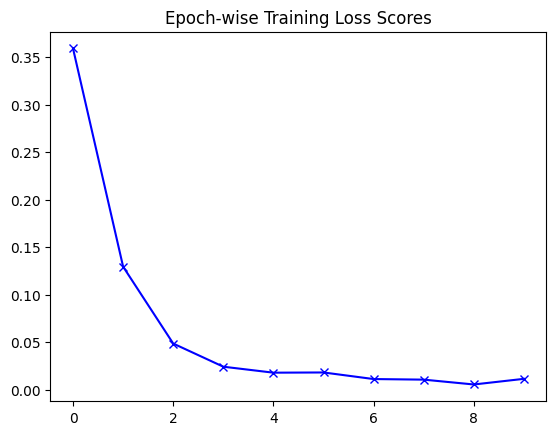

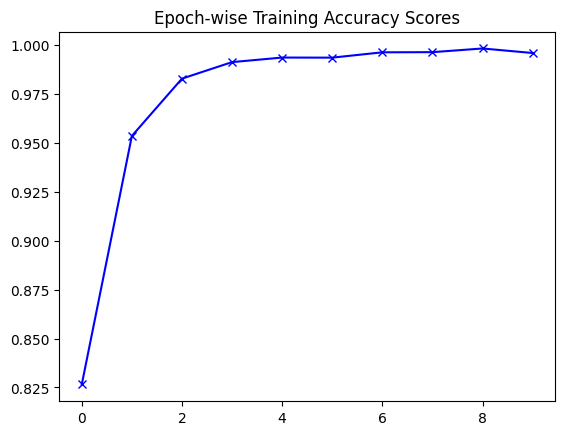

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], marker="x", color="blue")
plt.title("Epoch-wise Training Loss Scores")
plt.show()

plt.plot(history.history["accuracy"], marker="x", color="blue")
plt.title("Epoch-wise Training Accuracy Scores")
plt.show()

In [ ]:
print("Test Set Accuracy after 20 epochs: ", scores[0]*100)

Test Set Accuracy after 20 epochs:  99.43545460700989
